# Aula 3 - Regressão linear

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão linear simples
- 3) Regressão linear múltipla
- 4) Overfitting: um dos lados do tradeoff viés-variância

____
____
____

## 1) Introdução

Imagine que você quer vender sua casa.

Você sabe os atributos da sua casa: quantos cômodos têm, quantos carros cabem na garagem, qual é a área construída, qual sua localidade, etc.

Agora, a pergunta é: qual seria o melhor preço pra você colocá-la a venda, ou seja, quanto de fato ela vale?

Você pode solicitar a avaliação de um corretor de imóveis (contando com a experiência dele), ou então...

...fazer um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, pode fazer uma **predição** sobre o preço adequado da sua casa!

Para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a **Regressão Linear!**

____

Para introduzirmos as ideias, vamos usar um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **79 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target** (`SalePrice`), que é o preço pelo qual aquela casa foi vendida.

Por termos o target disponível, estamos trabalhando com um problema de **aprendizagem supervisionada**.

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/house_prices.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
nulos = df.isnull().sum()

In [6]:
nulos[nulos > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
(nulos[nulos > 0]/df.shape[0])*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
df.select_dtypes(exclude=np.number).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Por enquanto, não vamos nos preocupar com os dados missing, pois vamos usar apenas uma feature no nosso modelo inicial.

Aproveite para depois explorar os dados da forma que quiser!

Por enquanto, vamos dar uma olhada na coluna target!

Mas antes, vamos identificar e diferenciar as features (X) do target (y)

> Obs.: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna como feature.

In [9]:
# features: tudo exceto o target e o id (arbitrario)
X = df.drop(columns=["Id", "SalePrice"])

# target da nossa base - continuo, o que caracteriza regressão!
y = df["SalePrice"]

In [10]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [11]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [12]:
X.iloc[10].values

array([20, 'RL', 70.0, 11200, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
       'Inside', 'Gtl', 'Sawyer', 'Norm', 'Norm', '1Fam', '1Story', 5, 5,
       1965, 1965, 'Hip', 'CompShg', 'HdBoard', 'HdBoard', 'None', 0.0,
       'TA', 'TA', 'CBlock', 'TA', 'TA', 'No', 'Rec', 906, 'Unf', 0, 134,
       1040, 'GasA', 'Ex', 'Y', 'SBrkr', 1040, 0, 0, 1040, 1, 0, 1, 0, 3,
       1, 'TA', 5, 'Typ', 0, nan, 'Detchd', 1965.0, 'Unf', 1, 384, 'TA',
       'TA', 'Y', 0, 0, 0, 0, 0, 0, nan, nan, nan, 0, 2, 2008, 'WD',
       'Normal'], dtype=object)

In [13]:
y.iloc[10]

129500

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X.shape

(1460, 79)

In [16]:
X_train.shape

(1168, 79)

In [17]:
y_train.shape

(1168,)

In [18]:
X_test.shape

(292, 79)

In [19]:
y_test.shape

(292,)

Agora sim, vamos olhar com carinho pro target

In [20]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

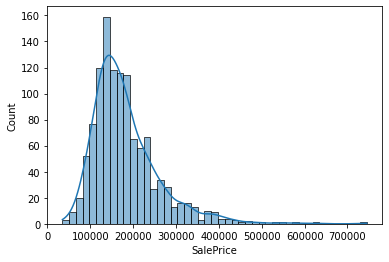

In [21]:
sns.histplot(y_train, kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

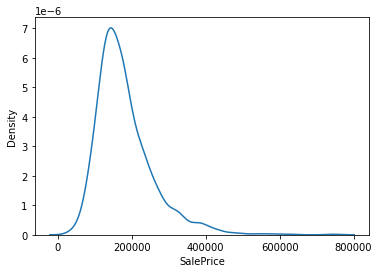

In [22]:
sns.kdeplot(y_train)

In [23]:
y_train.skew()

1.743128561420854

In [24]:
y_train.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

Tomar o log de distribuições enviesadas tende a diminuir o desvio:

In [25]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [26]:
log_price = np.log10(y_train)

In [27]:
log_price

254     5.161368
1066    5.250420
638     4.929419
799     5.243038
380     5.103804
          ...   
1095    5.246577
1130    5.130334
1294    5.060698
860     5.278639
1126    5.240549
Name: SalePrice, Length: 1168, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

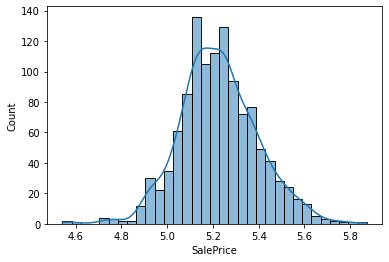

In [28]:
sns.histplot(log_price, kde=True)

<ipython-input-29-263e90887082>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(x))


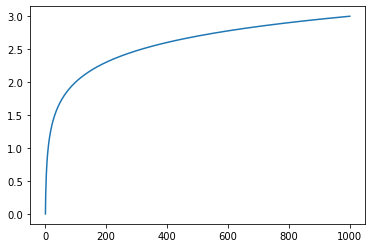

In [29]:
x = np.linspace(0, 1000, 1000) 
plt.plot(x, np.log10(x))

In [30]:
log_price.describe()

count    1168.000000
mean        5.224846
std         0.169639
min         4.542825
25%         5.113943
50%         5.217484
75%         5.332287
max         5.872156
Name: SalePrice, dtype: float64

Fica evidente que a distribuição é desviada para a direita.

Vamos tentar alterar isso na próximas versões do modelo para ver se teremos ganhos de performance!

Por enquanto, seguimos assim.

Vamos agora dar uma olhada na correlação das variáveis

<AxesSubplot:>

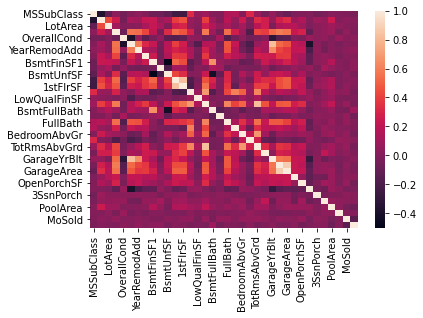

In [31]:
sns.heatmap(X_train.corr())

Em particular, podemos olhar a correlação entre as features e o target

In [32]:
corr_feats_target = pd.concat([X_train, y_train], axis=1).corr()["SalePrice"]

In [33]:
corr_feats_target

MSSubClass      -0.088081
LotFrontage      0.330066
LotArea          0.266204
OverallQual      0.785555
OverallCond     -0.074391
YearBuilt        0.516501
YearRemodAdd     0.508593
MasVnrArea       0.459123
BsmtFinSF1       0.359460
BsmtFinSF2      -0.005731
BsmtUnfSF        0.222487
TotalBsmtSF      0.597766
1stFlrSF         0.587883
2ndFlrSF         0.314030
LowQualFinSF    -0.011189
GrLivArea        0.695652
BsmtFullBath     0.226346
BsmtHalfBath    -0.048346
FullBath         0.552546
HalfBath         0.280481
BedroomAbvGr     0.156211
KitchenAbvGr    -0.142785
TotRmsAbvGrd     0.520388
Fireplaces       0.457549
GarageYrBlt      0.480351
GarageCars       0.640991
GarageArea       0.624139
WoodDeckSF       0.329843
OpenPorchSF      0.299969
EnclosedPorch   -0.149532
3SsnPorch        0.051532
ScreenPorch      0.119172
PoolArea         0.115630
MiscVal         -0.020179
MoSold           0.041890
YrSold          -0.009099
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [34]:
corr_feats_target[corr_feats_target.abs() > 0.65].index

Index(['OverallQual', 'GrLivArea', 'SalePrice'], dtype='object')

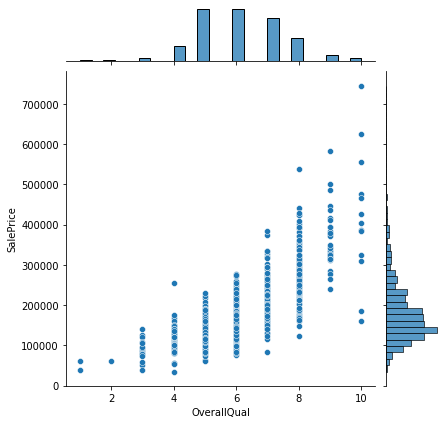

In [35]:
sns.jointplot(x=X_train["OverallQual"], y=y_train);

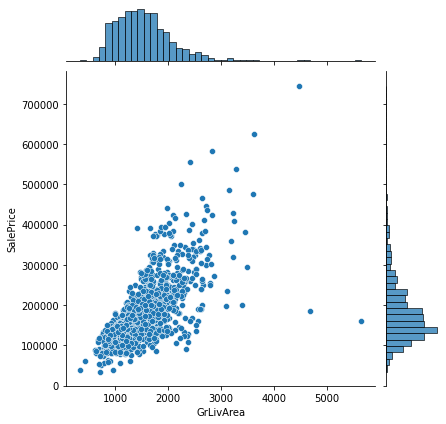

In [36]:
sns.jointplot(x=X_train["GrLivArea"], y=y_train);

Parece que a variável de área construída ("GrLivArea") é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Mas note que há claramente dois outliers... 

Vamos retirá-los (por propositos pedagogicos - lembre-se de tentar entender o pq dos outliers)

In [37]:
idxs_outliers = X_train.query("GrLivArea > 4500").index

idxs_outliers

Int64Index([523, 1298], dtype='int64')

In [38]:
y_train = y_train.drop(index = idxs_outliers)

X_train = X_train.drop(index = idxs_outliers)

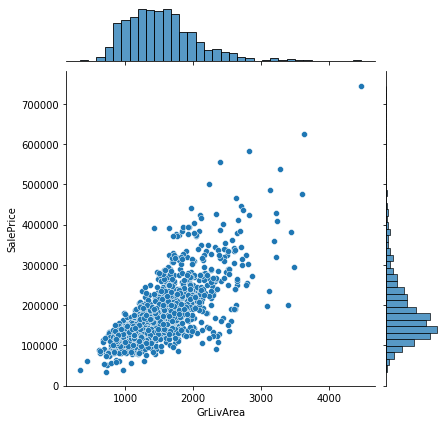

In [39]:
sns.jointplot(x=X_train["GrLivArea"], y=y_train);

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável GrLivArea para predizer o preço!

In [40]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1166, dtype: int64

In [41]:
X_train["GrLivArea"]

254     1314
1066    1571
638      796
799     1768
380     1691
        ... 
1095    1314
1130    1981
1294     864
860     1426
1126    1555
Name: GrLivArea, Length: 1166, dtype: int64

___
___
___

## 2) Regressão linear simples

Apesar de alguns outliers, parece bem adequado que os pontos plotados acima sejam descritos por uma reta, não é mesmo?

Ou, melhor dizendo: **a variável GrLivArea parece estar relacionada ao target SalePrice linearmente!**

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona Y (o preço da casa) e X (os atributos da casa). 

Se utilizarmos **apenas um atributo** (como, por exemplo, a área construída), temos uma **Regressão Linear Simples**, e nosso modelo é:

$$ \hat{y} = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes (ou **parâmetros**) a serem determinados: $b_0$ (intercepto ou coeficiente linear) e $b_1$ (coeficiente angular). 

A equação acima exprime a **forma funcional** do conjunto de hipóteses com o qual trabalharemos: funções lineares, de uma úniva variável. Isto é,

$$ f_{H, \vec{b}} = b_0 + b_1 X $$

Ou seja,

$$ \mathcal{H} = \{ f_{H, \vec{b}}\} = \{ b_0 + b_1 X \} $$ 

é o conjunto de hipóteses que está sendo considerado, e o vetor de parâmetros é:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$$

O **algoritmo de aprendizagem** do estimador é utilizado justamente para encontrarmos os coeficientes $b_0$ e $b_1$ (isto é, o vetor de parâmetros) **que melhor se ajustam aos dados!**

Para fazer isso, pode-se utilizar o método dos **mínimos quadrados** (OLS  - ordinary least squares) ou então o [gradiente descendente](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931).

Vamos conhecer o OLS!

## O algoritmo de aprendizagem da regressão linear

De maneira esquemática, um algoritmo de aprendizagem recebe:

- Um conjunto de hipóteses $\mathcal{H}$;
- Um conjunto de dados de treino $\left(X_i, y_i \right)$

A partir destes inputs, o algoritmo constrói uma **função de perda**, que nada mais é que uma função que contabiliza **os erros cometidos pelo modelo**.

E para sabermos o quanto um modelo está errando é muito simples: basta **compararmos o target predito $\hat{y}$ com o target real $y$**!

Isso pode ser feito de muitas maneiras. A "maneira" específica é o que determina a relação funcional da função de custo de interesse. Para regressão linear, a função de perda mais comum é o **erro quadrático (squared error)**:

$$\text{SE}= (y_i-\hat{y}_i)^2$$

Onde $i = 1, 2, \cdots, n$ é um índice que identifica cada uma das $n$ observações de treino.

Obs.: se tomarmos a média do SE em toda a base de treino, temos o **Mean Squared Error** (MSE):

$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> Quando tomamos a função de erro para uma única observação, a chamamos de **função de perda**. Quando tomamos sua média sobre todo o dataset, a chamamos de **função de custo**. Na prática, os termos são usados como sinônimos (e, pro problema matemático a ser resolvido, tanto faz também).

<img src=https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png width=400>

Agora, note uma coisa muito importante: **a função de custo é inteiramente dependente da função de hipótese (e, portanto, dos parâmetros!) e dos dados de treino!**

De fato, para a i-ésima observação, $\hat{y}_i = b_0 + b_1 X_i$ (note aqui a dependência da hipótese e dos dados!). Assim,

$$(y_i-\hat{y}_i)^2 = (y_i - (b_0 + b_1 X_i))^2 $$

Por isso, escrevemos a função de custo como $\mathcal{L}_{H, \vec{b}}(X_i, y_i)$, para deixar claro que ela depende tanto dos dados $\left(X_i, y_i \right)$ quando da hipótese parametrizada:

$$\mathcal{L}_{H, \vec{b}}(X_i, y_i) = \sum_{i=1}^n(y_i - (b_0 + b_1 X_i))^2$$


Uma vez que temos uma função de custo, nosso objetivo passa a ser **minimizá-la**. E isso faz total sentido: queremos que nosso modelo, após ter "aprendido", erre o mínimo possível!

Por isso, naturalmente caímos em um **problema de otimização**. Mas, a pergunta que surge é: queremos minimizar o erro **com relação a que?**

Agora, é importante lembrarmos que a **função hipótese é parametrizada**. E é justamente o vetor de parâmetros que determina **a reta que melhor se ajusta aos dados**. 

Assim, podemos resumir o objetivo do algoritmo de aprendizagem como:

> Determinar o vetor de parâmetros que minimiza a função de custo nos dados de treino

E isso faz total sentido, não é mesmo?

E, operacionalmente, isso é justamente o que queremos fazer:

$$\hat{b} = \operatorname*{argmin}_b \left( \mathcal{L}_{H, \vec{b}}(X_i, y_i) \right)$$

Existe uma forma muito conhecida e natural para resolvermos problemas de otimização como este: o famoso "deriva e iguala a 0".

E é exatamente o que o método OLS nos dá: através da otimização explícita da função de custo quadrática, temos uma expressão analítica para os parâmetros:

$$ \left\{\begin{matrix}
\frac{\partial \mathcal{L}}{\partial b_0} = 0\\ 
\frac{\partial \mathcal{L}}{\partial b_1} = 0
\end{matrix}\right. 
\Rightarrow
\left\{\begin{matrix}
\hat{b}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}\\ 
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}
\end{matrix}\right. \ ,
$$

onde: $\bar{x} = \frac{1}{n} \sum_i x_i$ e $\bar{y} = \frac{1}{n} \sum_i y_i$, são os valores médios da feature e target, respectivamente.

Para quem quiser saber detalhes sobre o procedimento acima, sugiro as referências citadas, ou então [este artigo super simples](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf).

E esse é o algoritmo de aprendizagem da regressão linear!

_________

# Passo 1 - construção do modelo

Agora temos os dados, escolhemos o conjunto de hipóteses, e conhecemos também o algoritmo de treinamento da regressão linear!

Felizmente, não precisamos implementar este algoritmo na mão (embora, caso queira, fique à vontade! É um ótimo exercício!)

Aqui na aula, usaremos o sklearn para isso!

Vamos começar?

In [42]:
# nesse primeiro modelo, queremos uma regressão linea simples, só com essa uma feature
# (o reshape é pra convenção do sklearn)
X_train_1d = X_train["GrLivArea"].values.reshape(-1, 1)

In [43]:
X_train["GrLivArea"].values

array([1314, 1571,  796, ...,  864, 1426, 1555], dtype=int64)

In [44]:
X_train_1d

array([[1314],
       [1571],
       [ 796],
       ...,
       [ 864],
       [1426],
       [1555]], dtype=int64)

In [45]:
# passo 1 - import a classe (aqui é que escolhemos a hipotese)
from sklearn.linear_model import LinearRegression

# passo 2 - instancia o objeto do estimador 
reglin = LinearRegression()

# passo 3 - treinar o modelo (aqui que damos os dados, pra treinar o modelo)
reglin.fit(X_train_1d, y_train)

LinearRegression()

In [46]:
reglin = LinearRegression().fit(X_train_1d, y_train)

reglin

LinearRegression()

Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

In [47]:
vars(reglin)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([112.12517083]),
 '_residues': 3269050466968.8315,
 'rank_': 1,
 'singular_': array([17148.49137244]),
 'intercept_': 10895.38004325694}

In [48]:
# esse é o termo independente, b0
reglin.intercept_

10895.38004325694

In [49]:
reglin.coef_

array([112.12517083])

In [50]:
# esse é o b1
reglin.coef_[0]

112.12517082752618

$$\vec{\hat{b}} = \begin{bmatrix}
\hat{b}_0\\ 
\hat{b}_1
\end{bmatrix} = 
\begin{bmatrix}
10895.38\\ 
112.12
\end{bmatrix}$$

Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ \hat{y} = \mathcal{M} = f_{H, \hat{\vec{b}}}(X = \text{GrLiveArea}) =  10895.38 + 112.12 \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 112.12!

> O preço mínimo a ser pago, independente da área construída, é de 10895.38!

Podemos visualizar o modelo treinado, neste caso:

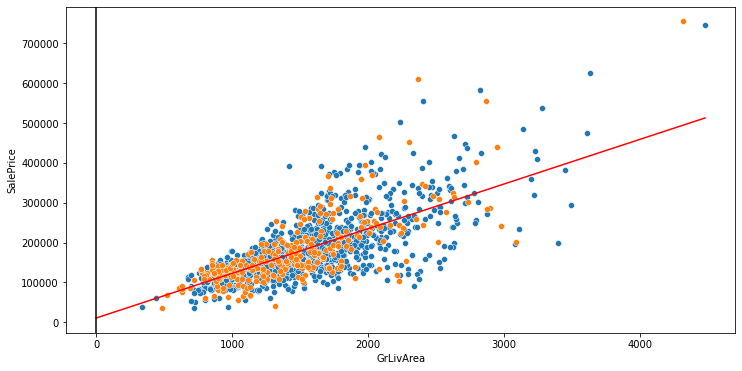

In [51]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=X_train["GrLivArea"], y=y_train)

sns.scatterplot(x=X_test["GrLivArea"], y=y_test)

# ==============================================

x = np.linspace(0, X_train["GrLivArea"].max(), 100)
y = reglin.intercept_ + reglin.coef_[0]*x

plt.plot(x, y, color="red")

plt.axvline(x=0, color="black")

plt.show()

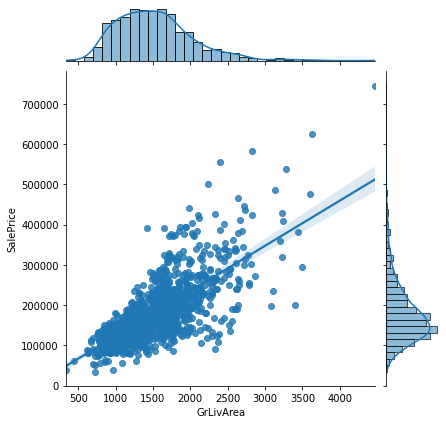

In [52]:
sns.jointplot(x=X_train["GrLivArea"], y=y_train, kind="reg")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

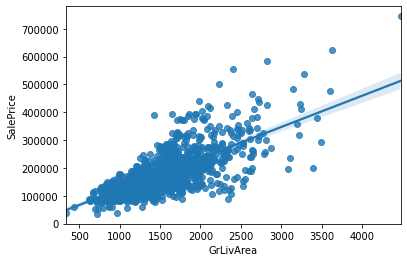

In [53]:
sns.regplot(x=X_train["GrLivArea"], y=y_train)

É raro que consigamos visualizar nosso modelo final como fizemos acima, mas no caso da regressão linear simples, temos essa sorte! :)

Vamos agora fazer algumas previsões!

In [54]:
x = 3000
y = reglin.intercept_ + reglin.coef_[0]*x

print(f"Para uma casa de área {x}, o preço deve ser {y}")

Para uma casa de área 3000, o preço deve ser 347270.8925258354


Ou ainda:

In [55]:
x = 3000
y = reglin.predict([[x]])

print(f"Para uma casa de área {x}, o preço deve ser {y[0]}")

Para uma casa de área 3000, o preço deve ser 347270.8925258354


Pedizendo vários valores de uma vez (muito mais comum)

In [56]:
X_test["GrLivArea"].values.reshape(-1, 1)

array([[1068],
       [2622],
       [1028],
       [1664],
       [1620],
       [ 630],
       [1954],
       [1456],
       [ 630],
       [1393],
       [1477],
       [ 874],
       [ 894],
       [1535],
       [1690],
       [1008],
       [1720],
       [1134],
       [1012],
       [1479],
       [1803],
       [1590],
       [1476],
       [ 936],
       [1431],
       [1199],
       [1340],
       [ 864],
       [1604],
       [1352],
       [1252],
       [2046],
       [3086],
       [ 952],
       [1636],
       [1136],
       [1904],
       [1928],
       [2520],
       [ 882],
       [1176],
       [2110],
       [ 950],
       [2042],
       [ 988],
       [2210],
       [ 912],
       [ 955],
       [2296],
       [1524],
       [ 988],
       [1567],
       [1304],
       [2898],
       [ 848],
       [1734],
       [1775],
       [1126],
       [1117],
       [ 827],
       [ 520],
       [1246],
       [2473],
       [1506],
       [1776],
       [2158],
       [10

In [57]:
y_test.values[:10]

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500], dtype=int64)

In [58]:
reglin.predict(X_test["GrLivArea"].values.reshape(-1, 1)).round(2)[:10]

array([130645.06, 304887.58, 126160.06, 197471.66, 192538.16,  81534.24,
       229987.96, 174149.63,  81534.24, 167085.74])

____________

# Passo 2 - avaliação do modelo

Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

É nesse momento que entra em jogo a **base de teste**!

Conheceremos agora algumas **métricas de avaliação**, que são medidas quantitativas para, de uma forma ou de outra, **comparar os targets reais com os targets preditos**.

> Existem várias métricas de avaliação diferentes, e cada uma avalia **um aspecto particular** da performance do modelo.

> Problemas de regressão e classificação admitem métricas de avaliação diferentes, dada a diferença entre os targets (contínuo vs discreto).

Ao analisarmos estas métricas **calculadas na base de teste**, podemos ter uma ideia boa sobre o **poder de generalização** de nosso modelo, pois estaremos efetivamente testando o modelo com **observações que não foram utilizadas em sua construção!**

Obs.: até podemos calcular as métricas de avaliação na base de treino, mas o propósito desse cálculo **não é a avaliação da generalização**. Veremos mais a frente em que contextos vale a pena calcularmos as métricas na base de treino. Mas, antes, vamos conhecer quais são as principais métricas!

In [59]:
y_pred = reglin.predict(X_test["GrLivArea"].values.reshape(-1, 1)).round(2)

In [60]:
y_pred

array([130645.06, 304887.58, 126160.06, 197471.66, 192538.16,  81534.24,
       229987.96, 174149.63,  81534.24, 167085.74, 176504.26, 108892.78,
       111135.28, 183007.52, 200386.92, 123917.55, 203750.67, 138045.32,
       124366.05, 176728.51, 213057.06, 189174.4 , 176392.13, 115844.54,
       171346.5 , 145333.46, 161143.11, 107771.53, 190744.15, 162488.61,
       151276.09, 240303.48, 356913.66, 117638.54, 194332.16, 138269.57,
       224381.71, 227072.71, 293450.81, 109789.78, 142754.58, 247479.49,
       117414.29, 239854.98, 121675.05, 258692.01, 113153.54, 117974.92,
       268334.77, 181774.14, 121675.05, 186595.52, 157106.6 , 335834.13,
       105977.52, 205320.43, 209917.56, 137148.32, 136139.2 , 103622.9 ,
        69200.47, 150603.34, 288180.93, 179755.89, 210029.68, 252861.5 ,
       126832.81, 264522.52, 120105.3 , 174373.88, 183007.52, 146678.96,
       112592.91, 127505.56, 275959.28, 155648.98, 279098.79, 282014.04,
       139839.33,  98353.01, 121562.92, 131654.19, 

Observação: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna de nosso modelo!

Vamos conhecer algumas métricas para problemas de regressão!

Em problemas de regressão, é uma boa ideia dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que **os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!** Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

Rearranjando os termos, podemos escrever a equação acima como:

$$ \hat{y}_i= y_i - R(y_i)  $$

Perceba, portanto, que um modelo perfeito (o que, lembre-se, é virtualmente impossível, e não o que queremos!), seria tal que $\hat{y}_i= y_i$. Podemos visualizar este caso:

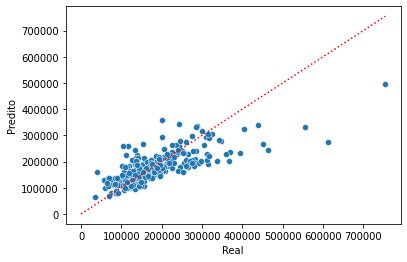

In [61]:
x = np.linspace(0, y_test.max())
y = x

plt.plot(x, y, color="red", ls=":")

sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("Real")
plt.ylabel("Predito")

plt.show()

O caso 100% perfeito (na prática, impossível) seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas temos que tomar muito cuidado com a forma como interpretaremos esta métrica! Discutiremos mais a diante a importância de calcularmos as métricas de avaliação também na base de treino.

Por enquanto, vamos calcular o $R^2$ nos dados de teste apenas, como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**

Então, quanto mais próximo de 1, melhor o modelo!

In [62]:
# esse é o y_barra (valor medio do target - é o modelo mais simples possível)
y_train.mean()

181457.09348198972

In [63]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5675383111402961

Outra coisa importante é que os resíduos sejam normalmente distribuídos (isso faz parte das premissas da visão mais estatística da regressão linear). Se esse não for o caso, pode ser importante que você reveja se a regressão linear de fato é um modelo adequado ao seu problema.

Mas, de maneira mais genérica, é interessante avaliarmos a **distribuição dos resíduos** para termos uma ideia da distribuição dos erros.

In [64]:
residuos = y_test - y_pred

residuos

892      23854.94
1105     20112.42
413     -11160.06
522     -38471.66
1036    122961.84
          ...    
479     -48237.95
1361     77553.11
802      14850.37
651     -72204.39
722      16728.47
Name: SalePrice, Length: 292, dtype: float64

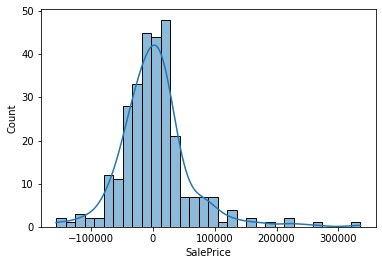

In [65]:
sns.histplot(residuos, kde=True);

In [66]:
residuos.describe()

count       292.000000
mean       3376.936062
std       57594.082908
min     -156822.390000
25%      -29205.515000
50%        -176.810000
75%       22218.205000
max      335697.720000
Name: SalePrice, dtype: float64

Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean absolute percentage error** (MAPE) é o erro absoluto médio relativo ao valor real dos targets:

$$\frac 1n\sum_{i=1}^n \left | \frac{y_i-\hat{y}_i}{y_i} \right| $$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é a métrica mais popular, pois essa métrica penaliza mais erros maiores, o que faz mais sentido na maior parte das aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.
- **MAPE** penaliza mais resíduos negativos (isto é, erros pra cima) do que residuos positivos (erros pra baixo).
    - $y_i = 100$ e $\hat{y}_i = 150$ (erro pra cima). Temos: $\text{MAPE} = \left | \frac{100 - 150}{100} \right| = 50 \%$
    - $y_i = 200$ e $\hat{y}_i = 150$ (erro pra baixo). Temos: $\text{MAPE} = \left | \frac{200 - 150}{200} \right| = 25 \%$

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

Inclusive, já conhecemos uma delas: O MSE, que é usado como função de custo para o OLS!

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
# print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

MAE: 38473.85
RMSE: 57594.46
MAPE: 0.23


In [68]:
38473.85/181457.093482

0.2120272581342569

In [69]:
y_train.describe()

count      1166.000000
mean     181457.093482
std       77327.262158
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214975.000000
max      745000.000000
Name: SalePrice, dtype: float64

Vamos dar uma olhada em tudo junto:


In [70]:
def plot_scatter_real_pred(y_test, y_pred):
    
    x = np.linspace(0, y_test.max())
    y = x

    plt.title("Target real x target predito")
    
    plt.plot(x, y, color="red", ls=":")

    sns.scatterplot(x=y_test, y=y_pred)

    plt.xlabel("Real")
    plt.ylabel("Predito")

    plt.show()

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True):

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)
    
    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    print(f"R^2: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())
    
    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()


Métricas de avaliação (dados de teste):



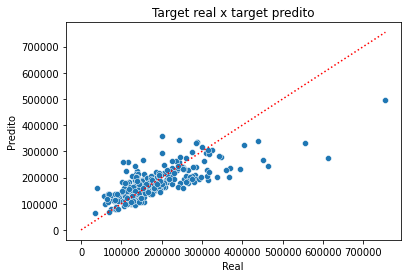

R^2: 0.57
MAE: 38473.84
RMSE: 57594.46
MAPE: 23.34%

Distribuição dos resíduos:

count       292.000000
mean       3376.936012
std       57594.082477
min     -156822.385818
25%      -29205.512403
50%        -176.809412
75%       22218.204254
max      335697.716120
Name: SalePrice, dtype: float64


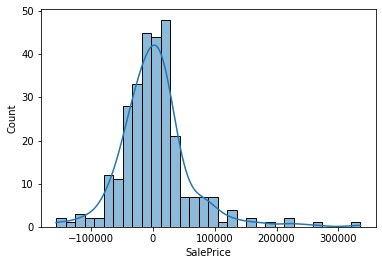

In [72]:
reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train, 
                X_test["GrLivArea"].values.reshape(-1, 1), y_test,
                plot=True)

In [73]:
reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train, 
                X_test["GrLivArea"].values.reshape(-1, 1), y_test,
                plot=False)


Métricas de avaliação (dados de teste):

R^2: 0.57
MAE: 38473.84
RMSE: 57594.46
MAPE: 23.34%

Distribuição dos resíduos:

count       292.000000
mean       3376.936012
std       57594.082477
min     -156822.385818
25%      -29205.512403
50%        -176.809412
75%       22218.204254
max      335697.716120
Name: SalePrice, dtype: float64


E é isso, passamos pela primeira vez pelo ciclo de modelagem! Muito legal, não é mesmo?

Mas, claro, é difícil de acreditar que um modelo tão simples, com uma única feature, é o melhor que podemos fazer.

Que tal fazermos algumas mudanças? Vamos entrar no ciclo!

___
___
___

## 3) Regressão linear múltipla

O modelo que fizemos acima considera uma única feature como preditora do preço da casa.

Mas temos outras 78 dessas features! Será que não há mais informação útil em todas essas outras variáveis?

Em geral, sim! É natural que esperemos que **mais variáveis** tragam **mais informações** ao modelo, e, portanto, o torne mais preciso! (embora, como veremos, não é verdade necessariamente que mais features nos deem um melhor modelo, em todos os casos).

Para incorporar estas outras variáveis ao modelo, é muito simples! 

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, que é expressa pela seguinte função de hipótese:

$$ \hat{y} = f_{H, \vec{b}} = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos! Ou seja, o vetor de parâmetros tem $n+1$ dimensões:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1\\
\vdots\\
b_n
\end{bmatrix}$$

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

O OLS também é válido para a regressão linear múltipla, mas o fato de termos muitas variáveis faz com que os cálculos do problema de otimização sejam consideravelmente mais complicados.

Para facilitar este procedimento, é muito comum utilizarmos uma **notação matricial**, que facilita muitíssimo o cálculo do problema de otimização. Para os interessados, sugiro as referências, ou então [esta lecture](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf).

Vamos construir esse modelo na prática com o sklearn!

Lembrando que podemos apenas passar pro sklearn **dados numéricos** e **preenchidos** (sem NaNs)!

V amos ler os dados novamente, pra garantir

Em particular, NÃO estamos mais jogando fora aqueles dois outliers! Isso vai ser legal pra gente analisar sua influência no modelo final :)

In [74]:
df = pd.read_csv("../datasets/house_prices.csv")

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   LotFrontage    951 non-null    float64
 2   LotArea        1168 non-null   int64  
 3   OverallQual    1168 non-null   int64  
 4   OverallCond    1168 non-null   int64  
 5   YearBuilt      1168 non-null   int64  
 6   YearRemodAdd   1168 non-null   int64  
 7   MasVnrArea     1162 non-null   float64
 8   BsmtFinSF1     1168 non-null   int64  
 9   BsmtFinSF2     1168 non-null   int64  
 10  BsmtUnfSF      1168 non-null   int64  
 11  TotalBsmtSF    1168 non-null   int64  
 12  1stFlrSF       1168 non-null   int64  
 13  2ndFlrSF       1168 non-null   int64  
 14  LowQualFinSF   1168 non-null   int64  
 15  GrLivArea      1168 non-null   int64  
 16  BsmtFullBath   1168 non-null   int64  
 17  BsmtHalfBath   1168 non-null   int64  
 18  FullBa

In [76]:
nulos = X_train.select_dtypes(include=np.number).isnull().sum()

nulos[nulos > 0]

LotFrontage    217
MasVnrArea       6
GarageYrBlt     64
dtype: int64

In [77]:
nulos_teste = X_test.select_dtypes(include=np.number).isnull().sum()

nulos_teste[nulos_teste > 0]

LotFrontage    42
MasVnrArea      2
GarageYrBlt    17
dtype: int64

_____

In [78]:
# é isso que vamos usar como features! só dados numéricos, e sem NaNs
X_train_model = X_train.select_dtypes(include=np.number).dropna(axis="columns")

# usando o .loc no final, pra garantir que pegamos exatamente as mesmas features
X_test_model = X_test.loc[:, X_train_model.columns]

In [79]:
X_train_model.shape

(1168, 33)

In [80]:
X_train_model.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [81]:
assert(X_train_model.shape[1] == X_test_model.shape[1])
assert(X_test_model.isnull().sum().sum() == 0)

X_train_model.shape, X_test_model.shape

((1168, 33), (292, 33))

In [82]:
def calc_r2_adj(r2, y, X):
    
    return 1 - (1-r2)*(len(y) - 1)/(len(y) - X.shape[1] - 1)

In [83]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True):

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)
    
    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)
    r2_adj = calc_r2_adj(r2, y_test, X_test)
    
    print(f"R^2: {r2:.2f} | Adj R^2: {r2_adj:.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())
    
    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()
        
    # new: returnando o objeto do modelo treinado!
    return reglin

Vamos começar treinando de novo um modelo de reg lin só com uma unica feature (só pra comparar)

In [84]:
reglin_simples = reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train, 
                                 X_test["GrLivArea"].values.reshape(-1, 1), y_test,
                                 plot=False)


Métricas de avaliação (dados de teste):

R^2: 0.55 | Adj R^2: 0.55
MAE: 38341.20
RMSE: 58471.76
MAPE: 23.34%

Distribuição dos resíduos:

count       292.000000
mean       3515.754922
std       58466.163367
min     -149347.637583
25%      -30951.653433
50%       -2718.855323
75%       21621.209371
max      344473.352964
Name: SalePrice, dtype: float64


A performance caiu um pouco com relação ao que fizemos lá em cima, pq lemos os dados novamente e agora não estamos jogando aqueles dois outliers fora. Isso mostra o grande efeito dos outliers em um modelo como a regressão linear!

In [85]:
X_train_model.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,8400,5,6,1957,1957,922,0,392,1314,...,294,250,0,0,0,0,0,0,6,2010
1066,60,7837,6,7,1993,1994,0,0,799,799,...,380,0,40,0,0,0,0,0,5,2009
638,30,8777,5,7,1910,1950,0,0,796,796,...,0,328,0,164,0,0,0,0,5,2008
799,50,7200,5,7,1937,1950,569,0,162,731,...,240,0,0,264,0,0,0,0,6,2007
380,50,5000,5,6,1924,1950,218,0,808,1026,...,308,0,0,242,0,0,0,0,5,2010


In [86]:
X_train_model

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,8400,5,6,1957,1957,922,0,392,1314,...,294,250,0,0,0,0,0,0,6,2010
1066,60,7837,6,7,1993,1994,0,0,799,799,...,380,0,40,0,0,0,0,0,5,2009
638,30,8777,5,7,1910,1950,0,0,796,796,...,0,328,0,164,0,0,0,0,5,2008
799,50,7200,5,7,1937,1950,569,0,162,731,...,240,0,0,264,0,0,0,0,6,2007
380,50,5000,5,6,1924,1950,218,0,808,1026,...,308,0,0,242,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,9317,6,5,2006,2006,24,0,1290,1314,...,440,0,22,0,0,0,0,0,3,2007
1130,50,7804,4,3,1928,1950,622,0,500,1122,...,576,431,44,0,0,0,0,0,12,2009
1294,20,8172,5,7,1955,1990,167,0,697,864,...,572,0,0,0,0,0,0,0,4,2006
860,50,7642,7,8,1918,1998,0,0,912,912,...,216,0,240,0,0,0,0,0,6,2007



Métricas de avaliação (dados de teste):



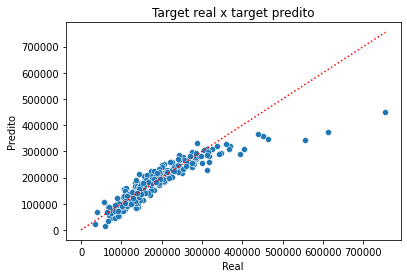

R^2: 0.82 | Adj R^2: 0.80
MAE: 22938.25
RMSE: 37312.27
MAPE: 13.45%

Distribuição dos resíduos:

count       292.000000
mean       3906.261898
std       37170.936225
min      -72360.843025
25%      -16250.719394
50%         862.782726
75%       16069.854162
max      306279.161692
Name: SalePrice, dtype: float64


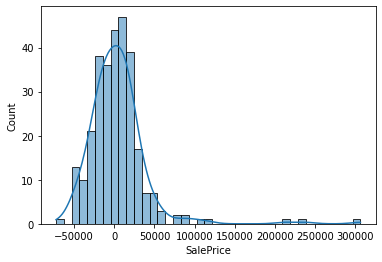

In [87]:
reglin_multi = reg_lin_pt1_pt2(X_train_model, y_train,
                               X_test_model, y_test, 
                               plot=True)

Vamos olhar para os parâmetros do modelo:

In [88]:
reglin_simples.intercept_, reglin_simples.coef_

(24899.74815733818, array([102.48895892]))

In [89]:
vars(reglin_multi)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'], dtype=object),
 'n_features_in_': 33,
 'coef_': array([-1.75548690e+02,  4.09174234e-01,  1.84955503e+04,  3.83573710e+03,
         3.37312908e+02,  1.80209917e+02,  1.00461555e+01, -4.61607099e+00,
         3.82786748e-01,  5.81287122e+00,  1.31240039e+01,  1.42134340e+01,
         4.50422890e+00,  3.18416668e+01,  1.10492803e+04, -3.26518493e+02,
 

In [90]:
reglin_multi.intercept_, reglin_multi.coef_

(-48411.54387301279,
 array([-1.75548690e+02,  4.09174234e-01,  1.84955503e+04,  3.83573710e+03,
         3.37312908e+02,  1.80209917e+02,  1.00461555e+01, -4.61607099e+00,
         3.82786748e-01,  5.81287122e+00,  1.31240039e+01,  1.42134340e+01,
         4.50422890e+00,  3.18416668e+01,  1.10492803e+04, -3.26518493e+02,
         3.42606130e+03, -1.66531509e+03, -9.08810085e+03, -1.00971990e+04,
         5.10100134e+03,  4.37021557e+03,  1.16074917e+04,  5.58607730e-01,
         2.55639049e+01, -6.62562003e+00,  7.06908781e+00,  3.85262374e+01,
         6.55989735e+01, -3.73443286e+01, -7.15692563e-01, -2.09433750e+02,
        -5.14524004e+02]))

In [91]:
reglin_multi.feature_names_in_

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [92]:
X_train["MSSubClass"].nunique()

15

In [93]:
X_train["MSSubClass"].value_counts()

20     434
60     240
50     113
120     64
70      52
30      50
160     49
80      45
90      41
190     28
85      17
75      15
45      10
180      7
40       3
Name: MSSubClass, dtype: int64

In [94]:
X_train["OverallQual"].value_counts()

6     311
5     308
7     258
8     135
4      88
9      36
3      16
10     13
1       2
2       1
Name: OverallQual, dtype: int64

In [95]:
params_df = pd.DataFrame(reglin_multi.coef_, index=reglin_multi.feature_names_in_, columns=["param_value"])

params_df

,param_value
MSSubClass,-175.548690
LotArea,0.409174
OverallQual,18495.550309
OverallCond,3835.737095
YearBuilt,337.312908
YearRemodAdd,180.209917
BsmtFinSF1,10.046155
BsmtFinSF2,-4.616071
BsmtUnfSF,0.382787
TotalBsmtSF,5.812871


_________

É possível interpretar os parâmetros e atribuir uma "importância" de cada feature ao valor do respectivo parâmetro. Mas, cuidado: essa análise é afetada pela escala das features! Veja:

In [96]:
X_train["OverallQual"].describe()

count    1168.000000
mean        6.121575
std         1.367619
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [97]:
params_df.loc["OverallQual", "param_value"]

18495.550309335667

$\hat{y} = \cdots + 18495.55 \text{OverallQual} + \cdots$

In [98]:
print(params_df.loc["OverallQual", "param_value"]*X_train["OverallQual"].min())
print(params_df.loc["OverallQual", "param_value"]*X_train["OverallQual"].mean())
print(params_df.loc["OverallQual", "param_value"]*X_train["OverallQual"].max())

18495.550309335667
113221.90471896406
184955.50309335667


In [99]:
X_train["YearBuilt"].describe()

count    1168.000000
mean     1970.965753
std        30.675495
min      1872.000000
25%      1953.000000
50%      1972.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [100]:
params_df.loc["YearBuilt", "param_value"]

337.31290775233856

$\hat{y} = \cdots + 337.31 \text{YearBuilt} + \cdots$

In [101]:
print(params_df.loc["YearBuilt", "param_value"]*X_train["YearBuilt"].min())
print(params_df.loc["YearBuilt", "param_value"]*X_train["YearBuilt"].mean())
print(params_df.loc["YearBuilt", "param_value"]*X_train["YearBuilt"].max())

631449.7633123777
664832.18936795
677998.9445822005


Uma forma de eliminarmos o efeito da escala, é **escalando os dados** (um pré-processamento).

Isso pode ser visto como uma terceira passada no ciclo.

In [102]:
X_train_model.describe().loc[["min", "max"]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,1127.0,2336.0,6110.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [103]:
X_test_model.describe().loc[["min", "max"]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,1491.0,2.0,2.0,1880.0,1950.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,70761.0,10.0,9.0,2009.0,2010.0,2188.0,1474.0,2042.0,3206.0,...,1390.0,466.0,274.0,318.0,238.0,396.0,576.0,600.0,12.0,2010.0


In [104]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(X_train_model)

X_train_model_mms = pd.DataFrame(mms.transform(X_train_model), columns=X_train_model.columns, index=X_train_model.index)
X_test_model_mms = pd.DataFrame(mms.transform(X_test_model), columns=X_test_model.columns, index=X_test_model.index)

In [105]:
X_train_model_mms.describe().loc[["min", "max"]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [106]:
X_test_model_mms.describe().loc[["min", "max"]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.000893,0.111111,0.125,0.057971,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.0,0.0
max,1.0,0.324668,1.000000,1.000,0.992754,1.0,0.387668,1.307897,0.874144,0.524714,...,0.980254,0.543757,0.500914,0.576087,0.468504,0.825,0.780488,0.03871,1.0,1.0


In [107]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True, scale_mms=False):

    if scale_mms:

        mms = MinMaxScaler().fit(X_train)

        # passamos assim, pra carregar o nome das features, e ter o .feature_names_in_
        X_train = pd.DataFrame(mms.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)
        
#         X_train = mms.transform(X_train)
#         X_test = mms.transform(X_test)
    
    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)
    
    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)
    r2_adj = calc_r2_adj(r2, y_test, X_test)
    
    print(f"R^2: {r2:.2f} | Adj R^2: {r2_adj:.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())
    
    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()
        
    # new: returnando o objeto do modelo treinado!
    return reglin


Métricas de avaliação (dados de teste):



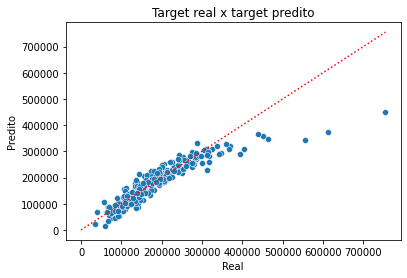

R^2: 0.82 | Adj R^2: 0.80
MAE: 22944.63
RMSE: 37317.50
MAPE: 13.45%

Distribuição dos resíduos:

count       292.000000
mean       3884.839205
std       37178.455395
min      -72380.588058
25%      -16310.664298
50%         823.909304
75%       16046.948499
max      306311.131773
Name: SalePrice, dtype: float64


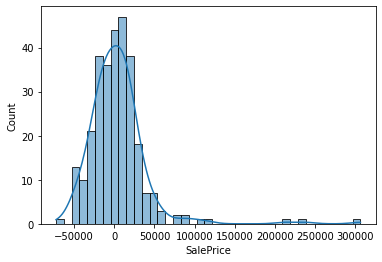

,param_value
MSSubClass,-2.990692e+04
LotArea,8.743753e+04
OverallQual,1.665872e+05
OverallCond,3.076871e+04
YearBuilt,4.658117e+04
YearRemodAdd,1.078255e+04
BsmtFinSF1,1.114685e+17
BsmtFinSF2,2.225814e+16
BsmtUnfSF,4.613578e+16
TotalBsmtSF,-1.206719e+17


In [108]:
reglin_multi_mms = reg_lin_pt1_pt2(X_train_model, y_train,
                                   X_test_model, y_test, 
                                   plot=True, scale_mms=True)

params_df = pd.DataFrame(reglin_multi_mms.coef_, index=reglin_multi_mms.feature_names_in_, columns=["param_value"])

params_df

In [109]:
params_df.abs().sort_values("param_value", ascending=False)

,param_value
GrLivArea,2.604494e+17
1stFlrSF,2.138354e+17
TotalBsmtSF,1.206719e+17
BsmtFinSF1,1.114685e+17
2ndFlrSF,1.013240e+17
BsmtUnfSF,4.613578e+16
LowQualFinSF,2.806651e+16
BsmtFinSF2,2.225814e+16
OverallQual,1.665872e+05
LotArea,8.743753e+04


In [110]:
# lista com as 10 features mais importantes
params_df.abs().sort_values("param_value", ascending=False)[:10].index.tolist()

['GrLivArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFinSF2',
 'OverallQual',
 'LotArea']

Análise de "componentes" das áreas da casa. Valeu José!!

In [111]:
aux = X_train[["1stFlrSF", "2ndFlrSF", "GrLivArea"]].copy()

aux["test"] = aux[["1stFlrSF", "2ndFlrSF"]].sum(axis=1)

aux

,1stFlrSF,2ndFlrSF,GrLivArea,test
254,1314,0,1314,1314
1066,799,772,1571,1571
638,796,0,796,796
799,981,787,1768,1768
380,1026,665,1691,1691
...,...,...,...,...
1095,1314,0,1314,1314
1130,1328,653,1981,1981
1294,864,0,864,864
860,912,514,1426,1426


In [112]:
aux.corr()

,1stFlrSF,2ndFlrSF,GrLivArea,test
1stFlrSF,1.000000,-0.213277,0.557241,0.563486
2ndFlrSF,-0.213277,1.000000,0.687505,0.686940
GrLivArea,0.557241,0.687505,1.000000,0.995833
test,0.563486,0.686940,0.995833,1.000000


In [113]:
(aux["test"] - aux["GrLivArea"]).sum()

-6653

In [114]:
(aux["test"] - aux["GrLivArea"] != 0).sum()

21

__________

A performance do modelo melhorou?

Será que dá pra melhorar mais?

Opções:

- tentar apenas um subconjunto de features: **feature selection**

- passar a utilizar as features categóricas, ou então criar novas features: **feature engeneering**

- Usar estimadores diferentes da regressão linear (quem sabe, métodos não-lineares?)

Isso, e muito mais, aprenderemos nos próximos módulos do curso! :D

____
____
____

## 4) Overfitting: um dos lados do tradeoff viés-variância

O famoso **tradeoff viés-variância** é um dos conceitos mais importantes em apredizado de máquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**. 

Quando isso ocorre, dizemos que nosso modelo sofre de **overfitting**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

E é essa a grande vantagem em calcularmos as métricas de avaliação tanto na base de treino quanto na base de teste: 

- analisando a diferença entre estas métricas, conseguimos facilmente inferir se houve overfitting (o que acontece quando há uma grande diferença entre as métricas de treino e de teste);

- identificar underfitting é algo um pouco mais sensível, e tem muito mais a ver com a expectativa que temos de performance para aquele modelo.

Por isso, daqui pra frente, vamos sempre criar o hábito de calcular e analisar as métricas de avaliação em ambas as bases!

> Mas nunca se esqueça que **para a avaliação da performance de generalização do modelo**, são as métricas de **teste** que devemos analisar!

Mas é legal calcularmos as métricas de treino para podermos avaliar o gap:

In [115]:
def calc_reg_metrics(model, X, y, label="", plot=False):
    
    y_pred = model.predict(X)

    print(f"\nMétricas de avaliação (dados de {label}):\n")

    if plot:
        plot_scatter_real_pred(y, y_pred)

    r2 = r2_score(y, y_pred)
    r2_adj = calc_r2_adj(r2, y, X)

    print(f"R^2: {r2:.2f} | Adj R^2: {r2_adj:.2f}")
    print(f"MAE: {mean_absolute_error(y, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y, y_pred))*100:.2f}%")

    residuos = y - y_pred
    print(f"\nDistribuição dos resíduos de {label}:\n")
    print(residuos.describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()

In [118]:
def calc_reg_metrics(model, X, y, label="", plot=False, dist_resids=True, print_stuff=True):
    
    y_pred = model.predict(X)

    if print_stuff:
        print(f"\nMétricas de avaliação (dados de {label}):\n")

    if plot:
        plot_scatter_real_pred(y, y_pred)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape = mean_absolute_percentage_error(y, y_pred)

    if print_stuff:
        print(f"R^2: {r2:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {mape:.2%}")

    if dist_resids:
        residuos = y - y_pred
        print(f"\nDistribuição dos resíduos de {label}:\n")
        print(pd.Series(residuos).describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()
        
    # retorna um dicionário com as métricas
    metrics_dict = {"r2" : r2, 
                    "mae" : mae,
                    "rmse" : rmse,
                    "mape" : mape}
    
    return metrics_dict


In [119]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True, scale_mms=False, train_metrics=True):

    if scale_mms:

        mms = MinMaxScaler().fit(X_train)

        # passamos assim, pra carregar o nome das features, e ter o .feature_names_in_
        X_train = pd.DataFrame(mms.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo
    
    if train_metrics:
        calc_reg_metrics(reglin, X_train, y_train, label="treino", plot=plot, dist_resids=False)
        print()
        print("#"*50)
        
    calc_reg_metrics(reglin, X_test, y_test, label="teste", plot=plot, dist_resids=False)

    # new: returnando o objeto do modelo treinado!
    return reglin

In [120]:
reglin_multi_mms = reg_lin_pt1_pt2(X_train_model, y_train,
                                   X_test_model, y_test, 
                                   plot=False, scale_mms=True, train_metrics=True)


Métricas de avaliação (dados de treino):

R^2: 0.80
MAE: 21058.28
RMSE: 34240.23
MAPE: 12.42%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.82
MAE: 22944.63
RMSE: 37317.50
MAPE: 13.45%


In [121]:
reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train, 
                                 X_test["GrLivArea"].values.reshape(-1, 1), y_test,
                                 plot=False)


Métricas de avaliação (dados de treino):

R^2: 0.48
MAE: 37328.74
RMSE: 55480.77
MAPE: 22.23%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.55
MAE: 38341.20
RMSE: 58471.76
MAPE: 23.34%


LinearRegression()

__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente no contexto de **redes neurais**. [Veja aqui](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) e [aqui](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) algumas discussões.

Na prática: **jamais se apegue à peformance de treino como forma de avaliar o modelo!** 

O que queremos otimizar sempre será a performance **avaliada nos dados de teste**, isto é, a **performance de generalização** do modelo. 

Assim, é **avaliando o modelo nos dados de teste** que garantimos que uma boa performance não é produto do overfitting!

Mais a diante, aprenderemos como transitar entre os regimes de under e overfitting.

Por enquanto, uma boa prática é comparar as métricas de treino com as métricas de teste, conforme fizemos acima. Isso nos permite avaliar, de maneira rápida e simples, se houve underfitting!